In [2]:
import numpy as np

In [204]:
N = 2048 # Number of grid points per side in real space
delta = 0.0025 # Separation between grid points in real space

In [205]:
delta_f = 1/(N*delta) # Separation between grid points in k space

In [206]:
f_x = np.arange(-np.floor(N/2), np.floor(N/2)) * delta_f

In [207]:
f_x, f_y = np.meshgrid(f_x, f_x)

In [208]:
def cart2pol(x, y):
    f = np.sqrt(x**2 + y**2)
    th = np.arctan2(y, x)
    return th, f

In [209]:
th, f = cart2pol(f_x, f_y)

In [210]:
r0 = 0.1 # Atmospheric coherence diameter [m]
l0 = 0.001 # Turbulence inner scale [m]
L0 = 1000 # Turbulence outer scale [m]

In [211]:
f_m = 5.92/(np.pi*l0)
f_0 = 1/L0

In [212]:
PSD_phi = 0.023 * r0 ** (-5/3) * np.exp(-(f/f_m)**2) / (f**2 + f_0**2) ** (11/6)

In [213]:
#PSD_phi[8,8]
# For some reason this one is huge
PSD_phi[int(N/2),int(N/2)] = 0

In [214]:
im = np.random.normal(size=(N, N))
re = np.random.normal(size=(N, N))
cn = (1j*im + re) * np.sqrt(PSD_phi) * delta_f

In [215]:
def ift2(G, delta_f):
    N, N = G.shape
    return np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(G))) * (N * delta_f)**2

In [259]:
phz = np.real(ift2(cn, 1))

In [3]:
def ft_phase_screen(D=2, r0=0.1, N=2048, delta=0.0025, L0=1000, l0=0.001):
    delta_f = 1/(N*delta) 
    f_x = np.arange(-np.floor(N/2), np.floor(N/2)) * delta_f
    f_x, f_y = np.meshgrid(f_x, f_x)
    
    def cart2pol(x, y):
        f = np.sqrt(x**2 + y**2)
        th = np.arctan2(y, x)
        return th, f
    
    th, f = cart2pol(f_x, f_y)
    f_m = 5.92/(np.pi*l0)
    f_0 = 1/L0
    
    PSD_phi = 0.023 * r0 ** (-5/3) * np.exp(-(f/f_m)**2) / (f**2 + f_0**2) ** (11/6)
    PSD_phi[int(N/2),int(N/2)] = 0
    
    im = np.random.normal(size=(N, N))
    re = np.random.normal(size=(N, N))
    cn = (1j*im + re) * np.sqrt(PSD_phi) * delta_f
    
    def ift2(G, delta_f):
        N, N = G.shape
        return np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(G))) * (N * delta_f)**2
    
    phz = np.real(ift2(cn, 1))
    
    return phz

In [4]:
phz = ft_phase_screen()

In [5]:
def str_fcn2_ft(ph, mask=None, delta=0.0025):
    N, N = ph.shape
    if mask is None:
        mask = np.ones([N,N])
        
    def ft2(g, delta):
        G = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(g))) * delta**2
        return G
    
    P = ft2(ph, delta)
    S = ft2(ph**2, delta)
    W = ft2(mask, delta)
    
    delta_f = 1/(N*delta) 
    
    def ift2(G, delta_f):
        N, N = G.shape
        g = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(G))) * (N * delta_f)**2
        return g
    
    G = W * np.conj(W)
    w2 = ift2(G, delta_f)
    
    G = np.real(S * np.conj(W) - np.abs(P)**2)
    D = 2 * ift2(G, delta_f) / w2 * mask
    
    return D

In [6]:
D = str_fcn2_ft(phz)

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline 

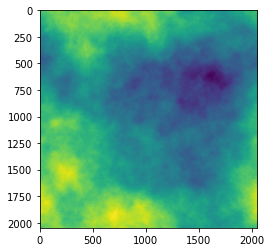

In [8]:
plt.imshow(phz)
plt.show()

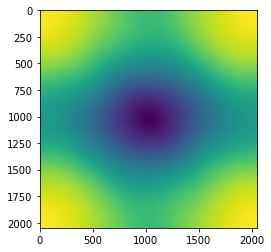

In [9]:
plt.imshow(D.real, interpolation='nearest')
plt.show()

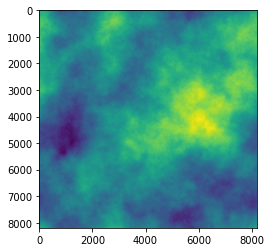

In [11]:
phz = ft_phase_screen(N=8192, delta=0.0025)
plt.imshow(phz)
plt.show()